<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Linear Regression-1
-------------------
 1. We are using a [dataset](https://github.com/teddcp/Machine-Learning-/tree/master/data-files) 'salary.csv' and implementing a linear regression model.

 2. Here we will create a model of **simple Linear Regression ** i.e` UNIVARIATE`


# Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing CSV

In [3]:
data=pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#renaming the columns
data.rename(columns={'YearsExperience':'yoe' , 'Salary':'salary' }, inplace=True )
data.head()

,yoe,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.info() # no null values are there and all are float i.e no categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yoe     30 non-null     float64
 1   salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.describe()

,yoe,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


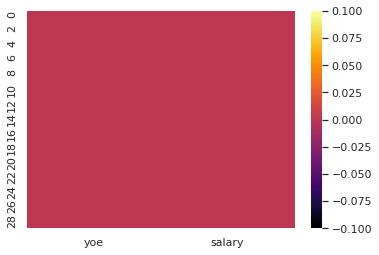

In [11]:
sns.heatmap(data.isna(),cmap='inferno')          # No Null value

# visualization

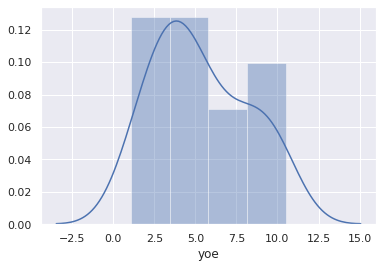

In [12]:
sns.distplot(data['yoe'])

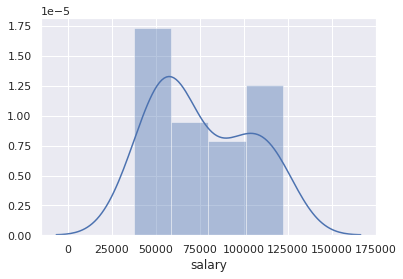

In [13]:
sns.distplot(data['salary'])

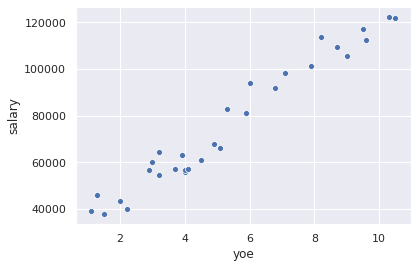

In [14]:
sns.scatterplot(x='yoe',y='salary',data=data)  # linearly distributed

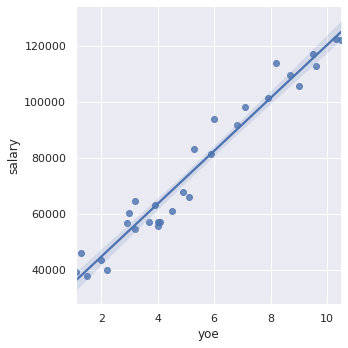

In [15]:
sns.lmplot(x='yoe',y='salary',data=data)

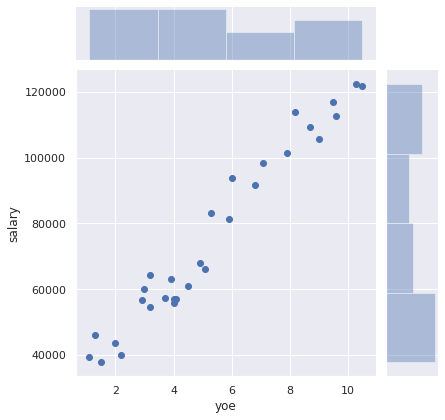

In [16]:
sns.jointplot(x='yoe',y='salary',data=data)

# data splitting for training and testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
# making x and y
x = data[['yoe']]  # it excepts the input should be a 2d
y = data['salary']

In [0]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=42)

# training the model

In [0]:
from sklearn.linear_model import LinearRegression as lr

In [0]:
model=lr(fit_intercept=True)

In [58]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
model.coef_,model.intercept_  # getting the coefficient and intercepts

(array([9339.08172382]), 25918.438334893202)

# Testing the model

In [0]:
prediction=model.predict(x_test)

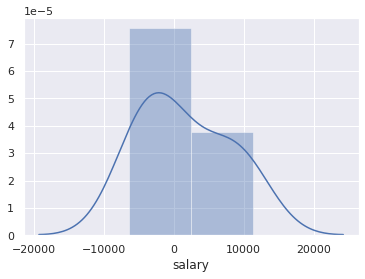

In [61]:
sns.distplot(y_test-prediction)  # should be a Gaussian distribution

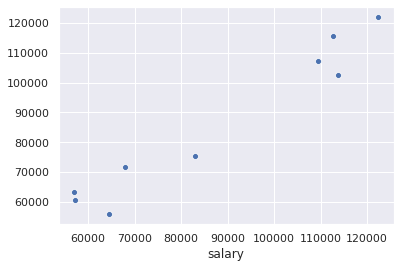

In [70]:
sns.scatterplot(y_test,prediction)  # should be a 45 degree line , then the model is good

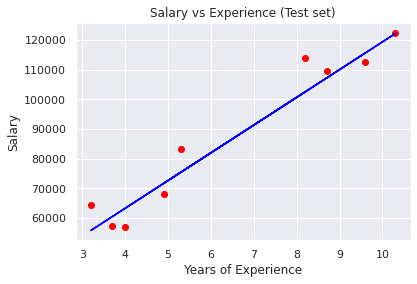

In [73]:
# plotting the res
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, prediction, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Checking the accuracy 

In [0]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [64]:
np.sqrt(mse(y_test,prediction))  # RMSE

6146.92300799458

In [65]:
round(r2_score(y_test,prediction),2)


0.94

# Note

1. Using linear simple model, the accuracy is 94% and the RMSE is 6146.92.

2.  Lets say i want to predict the salary of someone with a particular YOE of 20 years

In [68]:
input= [[20]]
model.predict(input)

array([212700.0728112])

In [0]:
# Thus that person will get a salary of 212700.073 .
# we have successfully predicted ..
# Done Model 1